# Tutorial 4

## Mean Squared Displacement (MSD)

Molecules in liquds, gases and solids do not stay in the same place and move constantly. Think about a drop of dye in a glass of water, as time passes the dye distributes throughout the water. This process is called diffusion and is common throughout nature and an incredibly relevant property for materials scientists who work on things like batteries.  

Using the dye as an example, the motion of a dye molecule is not simple. As it moves it is jostled by collisions with other molecules, preventing it from moving in a straight path. If the path is examined in close detail, it will be seen to be a good approximation to a random walk. In mathmatics a random walk is a series of steps, each taken in a random direction. This was analysed by Albert Einstein in a study of Brownian motion and he showed that the mean square of the distance travelled by a particle following a random walk is proportional to the time elapsed. 

\begin{align}
\Big \langle r_{i}^{2} \big \rangle & = 6 D_t + C 
\end{align}


where 

\begin{align}
\Big \langle r_{i}^{2} \big \rangle = \frac{1}{3} \Big< | r_{i}(t) - r_{i}(0) |^2 \Big>.
\end{align}


where $\Big \langle r^2 \big \rangle$ is the mean squared distance, t is time, $D_t$ is the diffusion rate and C is a constant. If $\Big \langle r_{i}^{2} \big \rangle$ s plotted as a function of time, the gradient of the curve obtained is equal to 6 times the self-diffusion coefficient of particle i. 
The state of the matter effects the shape of the MSD plot, solids, where little to no diffusion is occuring, has a flat MSD profile. In a liquid however, the particles diffusion randomly and the gradient of the curve is proportional to the diffusion coefficient. 

## What is the mean squared displacement

Going back to the example of the dye in water, lets assume for the sake of simplicity that we are in one dimension. Each step can either be forwards or backwards and we cannot predict which. From a given starting position, what distance is our dye molecule likely to travel after 1000 steps? This can be determined simply by adding together the steps, taking into account the fact that steps backwards subtract from the total, while steps forward add to the total. Since both forward and backward steps are equally probable, we come to the surprising conclusion that the probable distance travelled sums up to zero.

By adding the square of the distance we will always be adding positive numbers to our total which now increases linearly with time. Based upon equation 1 it should now be clear that a plot of $\Big \langle r_{i}^{2} \big \rangle$ vs time with produce a line, the gradient of which is equal to 6D. Giving us direct access to the diffusion coefficient of the system. 

In [1]:
from polypy import read as rd
from polypy import msd as msd
from polypy import utils as ut
from polypy import write as wr
import numpy as np

In [2]:
timestep = 0.1

This example will use a short 

In [3]:
data = rd.read_history("example_data/HISTORY", ["F"])

In [4]:
msd_data = msd.msd(data, timestep)

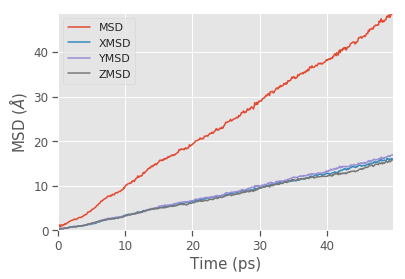

In [5]:
wr.msd_plot(msd_data, set_style="ggplot")

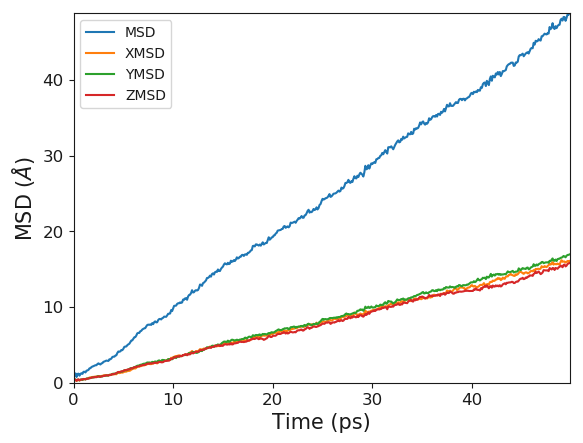

In [6]:
wr.msd_plot(msd_data, output="MSD_Theory.png")

In [7]:
Diff = ut.linear_regression(msd_data['time'], msd_data['msd'])
Diffusion_Coefficient = ut.three_d_diffusion_coefficient(Diff)

XDiff = ut.linear_regression(msd_data['time'], msd_data['xmsd'])
XDiffusion_Coefficient = ut.three_d_diffusion_coefficient(XDiff)

YDiff = ut.linear_regression(msd_data['time'], msd_data['ymsd'])
YDiffusion_Coefficient = ut.three_d_diffusion_coefficient(YDiff)

ZDiff = ut.linear_regression(msd_data['time'], msd_data['zmsd'])
ZDiffusion_Coefficient = ut.three_d_diffusion_coefficient(ZDiff)

In [8]:
print("Three Dimensional Diffusion Coefficient", Diffusion_Coefficient, "")
print("One Dimensional Diffusion Coefficient in X", XDiffusion_Coefficient)
print("One Dimensional Diffusion Coefficient in Y", YDiffusion_Coefficient)
print("One Dimensional Diffusion Coefficient in Z", ZDiffusion_Coefficient)


Three Dimensional Diffusion Coefficient 0.7255027887690944 
One Dimensional Diffusion Coefficient in X 0.46322875394586815
One Dimensional Diffusion Coefficient in Y 0.4442739326690323
One Dimensional Diffusion Coefficient in Z 0.48421870458585897


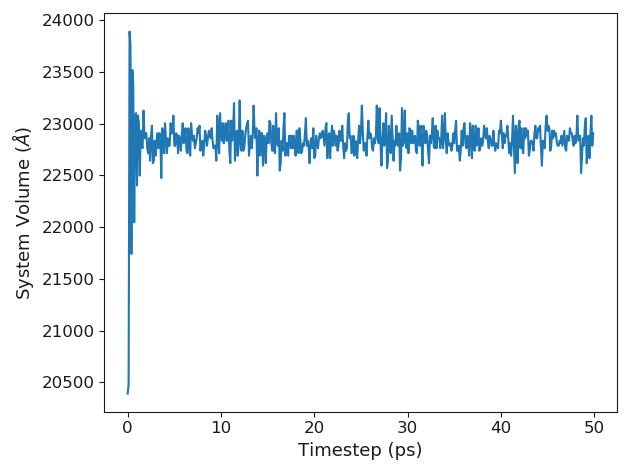

In [9]:
volume, time = ut.system_volume(data, timestep)
wr.volume_plot(time, volume)
Average_Volume = np.mean(volume[100:])

In [10]:
Number_of_Charge_Carriers = data['natoms']

In [11]:
Ionic_Conductivity = ut.conductivity(Number_of_Charge_Carriers, Average_Volume, Diffusion_Coefficient, 1500)

In [12]:
print("Ionic Conductivity :", Ionic_Conductivity)

Ionic Conductivity : 39.36096908912056


In [13]:
print("Resistivity :", (1 / Ionic_Conductivity)) 

Resistivity : 0.025405878542670377


In [14]:
smsd_data = msd.smooth_msd(data, 0.1, runs=10)

In [ ]:
wr.msd_plot(smsd_data)

Due to the large number 

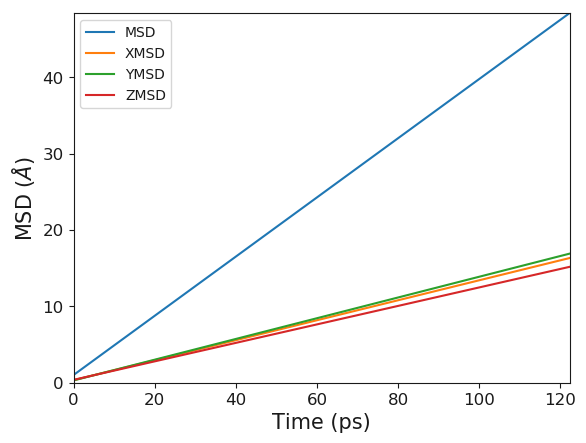

In [15]:
wr.msd_plot(smsd_data, fit=True)

## Simulation Length

It is important to consider the lenght of your simulation (Number of steps). The above examples use a short trajectory but it is at a sufficient temperature that there are enough diffusion events to get a good MSD plot. The following example is of a very short simulation, you will hopefully note that the MSD plot is clearly not converged. 

In [23]:
data_short = rd.read_history("example_data/HISTORY_short", ["F"])

In [24]:
msd_data = msd.msd(data_short, timestep)

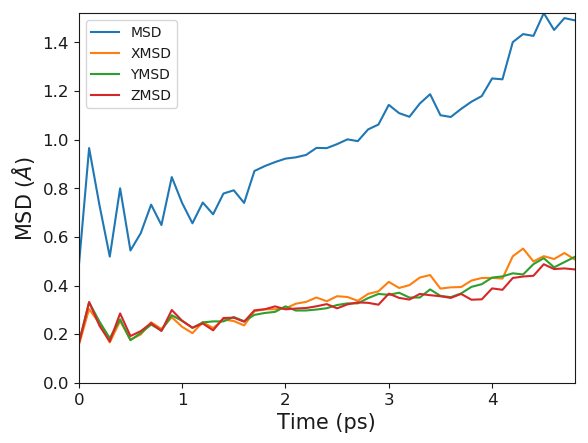

In [25]:
wr.msd_plot(msd_data, output="MSD_Theory.png")

In [26]:
Diff = ut.linear_regression(msd_data['time'], msd_data['msd'])
Diffusion_Coefficient = ut.three_d_diffusion_coefficient(Diff)

XDiff = ut.linear_regression(msd_data['time'], msd_data['xmsd'])
XDiffusion_Coefficient = ut.three_d_diffusion_coefficient(XDiff)

YDiff = ut.linear_regression(msd_data['time'], msd_data['ymsd'])
YDiffusion_Coefficient = ut.three_d_diffusion_coefficient(YDiff)

ZDiff = ut.linear_regression(msd_data['time'], msd_data['zmsd'])
ZDiffusion_Coefficient = ut.three_d_diffusion_coefficient(ZDiff)

In [27]:
print("Three Dimensional Diffusion Coefficient", Diffusion_Coefficient, "")
print("One Dimensional Diffusion Coefficient in X", XDiffusion_Coefficient)
print("One Dimensional Diffusion Coefficient in Y", YDiffusion_Coefficient)
print("One Dimensional Diffusion Coefficient in Z", ZDiffusion_Coefficient)

Three Dimensional Diffusion Coefficient 0.5634151782976387 
One Dimensional Diffusion Coefficient in X 0.3992597872198792
One Dimensional Diffusion Coefficient in Y 0.3940545927718295
One Dimensional Diffusion Coefficient in Z 0.3867199592864265


## Arrhenius


It is then possible to take diffusion coefficients, calculated over a large temperature range and, using the Arrhenius equation calculate the activation energy for diffusion. Common sense and chemical intuition suggest that the higher the temperature, the faster a given chemical reaction will proceed. Quantitatively this relationship between the rate a reaction proceeds and its temperature is determined by the Arrhenius Equation. At higher temperatures, the probability that two molecules will collide is higher. This higher collision rate results in a higher kinetic energy, which has an effect on the activation energy of the reaction. The activation energy is the amount of energy required to ensure that a reaction happens.  
  
\begin{align}
k = A * e^{(-Ea / RT)}
\end{align}
  
where k is the rate coefficient, A is a constant, Ea is the activation energy, R is the universal gas constant, and T is the temperature (in kelvin).

